# Lab 1.3: Exploratory Data Analysis (EDA) with Pandas

## Outline

* Introduction to Pandas
* EDA using Pandas

Exploratory data analysis is a first crucial step to building predictive models from your data. EDA allows you
to confirm or invalidate some of the assumptions you are making about your data and understand relationships between your variables.

## Getting Started with [Pandas](http://pandas.pydata.org/pandas-docs/version/0.17.1/)

### What is Pandas?
A Python library providing data structures and data analysis tools.

### Huh?
Think of it like Excel for Python but better.

In [29]:
#By convention import pandas like:
import pandas as pd

In [30]:
#For fake data.
from numpy.random import randn
import numpy as np

## Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [31]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [32]:
num_series = pd.Series(randn(10))
num_series.head()

0    0.100030
1    1.162508
2    0.172849
3    0.627039
4   -2.248221
dtype: float64

In [33]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

## Indexes
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [34]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-34-58220f032c97>, line 9)

In [ ]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

In [ ]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

In [ ]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

In [ ]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q')

## DataFrames
Data frames extend the concept of Series to table-like data.

In [ ]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

In [ ]:
#A dataframes columns are series:
col = df.a
type(col)

In [ ]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

In [ ]:
#The columns all have the same index:
col.index   

In [ ]:
#What's the index for the rows?
row.index

## DataFrame basics

In [ ]:
#New column
df['new'] = df['a'] + df['b']
df

In [ ]:
#Delete a column
df.drop('new', axis=1)

## Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [ ]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

## Selecting subsets
There a couple of ways to select a subset of a python data frame.

In [ ]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

In [ ]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

In [ ]:
#Selecting a column
df.a
#Works sometimes.

In [ ]:
df['a'] #works always

In [ ]:
df[['a', 'b']]
#Or a subset of columns

## Advanced selection
The above methods work for simple types of selections, but what if you need something more complex?

In [ ]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

In [ ]:
df.iloc[2:-3,2:5] #Ranges by number.

In [ ]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

In [ ]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [ ]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

In [ ]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

In [ ]:
df.loc['Alabama'].head()

In [ ]:
df.loc['2015-01-31'] #Doesn't work.

In [ ]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

In [ ]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

In [ ]:
df.head()

## split-apply-combine

In [ ]:
df.groupby(level=1).mean().head()

In [ ]:
df.groupby(level=0).mean().head() #Groupby index

In [ ]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

In [ ]:
#Apply
g = df.groupby(level=0)

In [ ]:
#If one row for each index.
g.aggregate(np.mean)

In [ ]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

In [ ]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

## Reading and writing data

In [ ]:
df.to_csv('saved_data.csv', delimiter='\t')

In [ ]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

## Other very useful things

join, concat and merge

In [ ]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

In [ ]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

In [ ]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

In [ ]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

## Exploratory Data Analysis with Pandas

In [ ]:
%pylab inline

In [ ]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

## Describe the continuous variables
### This treats the Boolean Windy variable as a series of 0's and 1's

In [ ]:
df.describe()

Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

### We can make use of df.plot() to produce simple graphs that calls on the more adjustable [Matplotlib](http://matplotlib.org/api/pyplot_api.html) library 

In [ ]:
df.hist(['Temperature','Humidity'],bins=5)

In [ ]:
df[['Temperature','Humidity']].plot(kind='box')

### Scatterplots for examining bivariate relationships

In [ ]:
df.plot('Temperature', 'Humidity', kind='scatter')

## What about the categorical variables? Frequency tables and relative frequency tables

### Simply df.value_counts() gets you the frequencies

In [ ]:
df['Outlook'].value_counts()

### Using apply will get you the value counts for multiple columns at once

In [ ]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

### Contingency Tables for looking at bivariate relationships between two categorical variables

In [ ]:
pd.crosstab(df['Outlook'], df['Result'])

### Often we want the row percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

### Or the column percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

## Lab Exercises

In this scenario, you are a data scientist at [Bay Area Bike Share](http://www.bayareabikeshare.com/). Your task
is to provide insights on bike user activity and behavior to the products team. 


1. Load the `trips` table into a dataframe. 
   
   Make 4 extra columns from the `start_date` column (We will use these in later questions):
   - `month` would contain only the month component
   - `dayofweek` would indicate what day of the week the date is
   - `date` would contain only the date component 
   - `hour` would only contain the hour component
   - [Hint to deal with datetime objects in pandas](http://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly)

2. Group the bike rides by `month` and count the number of users per month. Plot the number of users for each month. 
   What do you observe? Provide a likely explanation to your observation. Real life data can often be messy/incomplete
   and cursory EDA is often able to reveal that.
   
3. Plot the daily user count from September to December. Mark the `mean` and `mean +/- 1.5 * Standard Deviation` as 
   horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations. 
   
   ![image](images/timeseries.png)

4. Plot the distribution of the daily user counts for all months as a histogram. Comment on the distribution you see and explain why the distribution might be shaped as such. 
    
   <img src="images/hist.png" width="500">
  
5. Now we are going to explore hourly trends of user activity. Group the bike rides by `date` and `hour` and count 
   the number of rides in the given hour on the given date. Make a 
   [boxplot](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/) of the hours in the day **(x)** against
   the number of users **(y)** in that given hour. 
   
6. Someone from the analytics team made a line plot (_right_) that he claims is showing the same information as your
   boxplot (_left_). What information can you gain from the boxplot that is missing in the line plot?
   
   ![image](images/q1_pair.png)

7. ** Extra Credit **: Replot the boxplot in `6.` after binning your data into weekday and weekend. Describe the differences you observe between hour user activity between weekday and weekend? 
    

In [35]:
!conda install psycopg2 -y
!pip install ipython-sql

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jonathanhilgart/anaconda:
#
psycopg2                  2.6.2                    py35_0  


In [36]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [37]:
%pylab inline  
import pandas as pd
import yaml

Populating the interactive namespace from numpy and matplotlib


In [38]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

In [39]:
%sql $connection_string

'Connected: student@postgres'

In [40]:
trips_table = %sql SELECT * FROM trips;
trips = trips_table.DataFrame()

144015 rows affected.


# Question One
Load the trips table into a dataframe.

Make 4 extra columns from the start_date column (We will use these in later questions):

month would contain only the month component

dayofweek would indicate what day of the week the date is

date would contain only the date component

hour would only contain the hour component
Hint to deal with datetime objects in pandas

In [41]:
print(type(trips.start_date[0]))

#trips.head()

<class 'pandas.tslib.Timestamp'>


In [50]:
print(len(trips))
trips['month']=[trips.start_date[item].month for item in range(len(trips))]


144015


In [43]:
#trips.tail()

In [44]:
trips['day_of_week']=[trips.start_date[item].weekday() for item in range(len(trips))] ## weekday gives 0=Monday 6=Sunday

In [45]:
#trips.head()

In [46]:
trips['date']=[trips.start_date[item].date() for item in range(len(trips))]

In [47]:
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,day_of_week,date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,2013-08-29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,3,2013-08-29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,3,2013-08-29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,3,2013-08-29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,3,2013-08-29


In [48]:
trips['hour']=[trips.start_date[item].hour for item in range(len(trips))]
#trips['month'==2].value_counts()

# Question Two
Group the bike rides by month and count the number of users per month.

Plot the number of users for each month. 

What do you observe? Provide a likely explanation to your observation. Real life data can often be messy/incomplete and cursory EDA is often able to reveal that.

In [51]:
month_group =trips.groupby(['month'])
trips_per_month= pd.DataFrame(month_group['trip_id'].count()) #This gives a count of the number of trips per month
trips_per_month=trips_per_month.reset_index() ## reset the index so that everything is in the first row
trips_per_month


,month,trip_id
0,1,24428
1,2,19024
2,8,2102
3,9,25243
4,10,29105
5,11,24219
6,12,19894


In [52]:
!pip install seaborn
import seaborn as sns

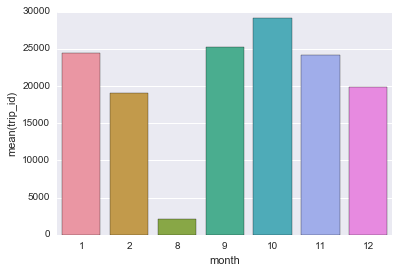

In [53]:
sns.barplot(x=trips_per_month['month'], y = trips_per_month['trip_id'])

### We notice that there are no bikes rides during some of the months (March, April, May, June, July). Most likely, we started collecting data in late August and stopped in February

# Question Three
Plot the daily user count from September to December. Mark the mean and mean +/- 1.5 * Standard Deviation as horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations.
image

In [54]:
sept_to_december =trips[(trips['month']<=12) & (trips['month']>=9)] ###new Data Frame only with the months we want

In [55]:
sept_to_december.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,day_of_week,date,hour,month
2102,7442,1508,2013-09-01 00:11:00,Mechanics Plaza (Market at Battery),75,9/1/2013 0:36,Beale at Market,56,506,Customer,55405,6,2013-09-01,0,9
2103,7443,1513,2013-09-01 00:12:00,Mechanics Plaza (Market at Battery),75,9/1/2013 0:37,Beale at Market,56,334,Customer,55405,6,2013-09-01,0,9
2104,7444,1345,2013-09-01 00:19:00,South Van Ness at Market,66,9/1/2013 0:41,Harry Bridges Plaza (Ferry Building),50,464,Customer,None,6,2013-09-01,0,9
2105,7445,931,2013-09-01 00:21:00,Mechanics Plaza (Market at Battery),75,9/1/2013 0:36,Mechanics Plaza (Market at Battery),75,422,Customer,None,6,2013-09-01,0,9
2106,7446,159,2013-09-01 00:23:00,Broadway at Main,25,9/1/2013 0:25,Franklin at Maple,21,239,Subscriber,94063,6,2013-09-01,0,9


In [56]:
sept_to_dec_grouped = sept_to_december.groupby(['date'])

In [57]:
sept_to_dec_grouped = sept_to_dec_grouped['trip_id'].count()
sept_to_dec_grouped.head()

#avg(sept_to_dec_grouped['trip_id'])
#sept_to_dec_grouped.drop(['duration','start_date','start_station'])

date
2013-09-01    706
2013-09-02    661
2013-09-03    597
2013-09-04    606
2013-09-05    677
Name: trip_id, dtype: int64

In [58]:
sept_to_dec_grouped.index.values.max()

datetime.date(2013, 12, 31)

In [59]:
from math import sqrt
avg_daily_trips = np.mean(sept_to_dec_grouped.values)
print(avg_daily_trips)
print((sept_to_dec_grouped.std()))
print(avg_daily_trips+1.5*sept_to_dec_grouped.values.std())
#http://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib show average line

807.057377049
287.4662552723989
1236.48591312


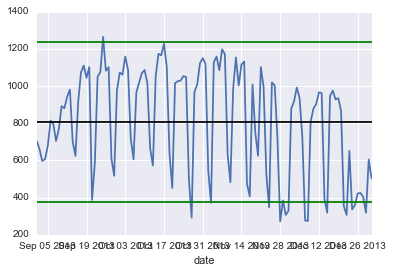

In [60]:
sept_to_dec_grouped.plot()
plt.plot((sept_to_dec_grouped.index.values.min(),sept_to_dec_grouped.index.values.max()),(avg_daily_trips,avg_daily_trips),'-k')
plt.plot((sept_to_dec_grouped.index.values.min(), sept_to_dec_grouped.index.values.max()),  # x start and x end
    (avg_daily_trips+1.5*sept_to_dec_grouped.values.std(),  # set 1.5 STD above
          avg_daily_trips+1.5*sept_to_dec_grouped.values.std()), '-g') # set 1.5 STD above
plt.plot((sept_to_dec_grouped.index.values.min(), sept_to_dec_grouped.index.values.max()), #x start and x end
    (avg_daily_trips-1.5*sept_to_dec_grouped.values.std(),  #set 1.5 STD  below
          avg_daily_trips-1.5*sept_to_dec_grouped.values.std()), '-g')#set 1.5 STD  below

## There seem to be more outliers during the winter months (noted by values below average daily riders - 1.5 times STD). This is probably because this winter months are the coldest months to ride a bike in!

# Question Four
Plot the distribution of the daily user counts for all months as a histogram. Comment on the distribution you see and explain why the distribution might be shaped as such.


In [61]:
trips.head()
all_months_grouped = trips['date'].groupby(trips['date']).count()
print(all_months_grouped)


date
2013-08-29     748
2013-08-30     714
2013-08-31     640
2013-09-01     706
2013-09-02     661
2013-09-03     597
2013-09-04     606
2013-09-05     677
2013-09-06     814
2013-09-07     796
2013-09-08     704
2013-09-09     769
2013-09-10     892
2013-09-11     880
2013-09-12     942
2013-09-13     981
2013-09-14     702
2013-09-15     624
2013-09-16     914
2013-09-17    1073
2013-09-18    1110
2013-09-19    1044
2013-09-20    1102
2013-09-21     388
2013-09-22     584
2013-09-23    1050
2013-09-24    1075
2013-09-25    1264
2013-09-26    1082
2013-09-27    1101
              ... 
2014-01-30     946
2014-01-31     839
2014-02-01     383
2014-02-02     128
2014-02-03     962
2014-02-04     994
2014-02-05     862
2014-02-06     486
2014-02-07     466
2014-02-08      94
2014-02-09      81
2014-02-10     803
2014-02-11     939
2014-02-12    1015
2014-02-13     937
2014-02-14     958
2014-02-15     415
2014-02-16     415
2014-02-17     464
2014-02-18    1013
2014-02-19    1012
2014-02

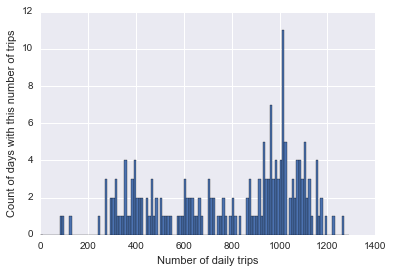

In [62]:
plt.hist(all_months_grouped.values,bins=[item for item in range(1300) if item %10==0])
plt.xlabel('Number of daily trips')
plt.ylabel('Count of days with this number of trips')

## There is a spike in the number of trips around 1,000 trips per day. This is most likely the average number of daily bike commuters where this data was collected.

# Question Five
Now we are going to explore hourly trends of user activity. Group the bike rides by date and hour and count the number of rides in the given hour on the given date. Make a boxplot of the hours in the day (x) against the number of users (y) in that given hour.


In [83]:
#!conda install seaborn -y
#import seaborn as sns

group_hours = trips.groupby(['date','hour']).trip_id.count().reset_index()
#hour_day_grouped = pd.DataFrame(hour_day_grouped['trip_id'].count())
#print(hou)
print( group_hours.head())



         date  hour  trip_id
0  2013-08-29     9       12
1  2013-08-29    10       14
2  2013-08-29    11       42
3  2013-08-29    12      120
4  2013-08-29    13       87


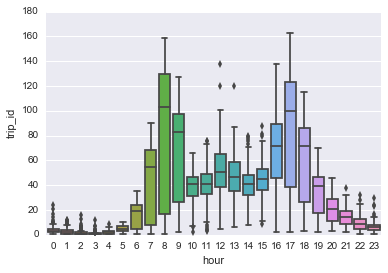

In [82]:

sns.boxplot(x = group_hours.hour, y=group_hours.trip_id) # I worked with Chau and Anthony on this problem
    
    

# Question Six
Someone from the analytics team made a line plot (right) that he claims is showing the same information as your boxplot (left). What information can you gain from the boxplot that is missing in the line plot?

From a boxplot you can see:
1) The 25% percentile (the bottom of the box)

2) The median (the middle of the box)

3) The 75% percentile (the top of the box)

4) The maximum (the top of the whisker)

5) The minimum (the bottom of the whisker)

6) Outliers (denoted as dots above or below the box plot)

The line plot only shows you total values for each item on the x-axis. Therefore, you are missing out on a lot of information that the box plot provides.

# Question Seven
Extra Credit : Replot the boxplot in 6. after binning your data into weekday and weekend. Describe the differences you observe between hour user activity between weekday and weekend?

In [ ]:
#http://stackoverflow.com/questions/19440129/how-to-filter-based-on-a-boolean-in-a-column-and-return-a-groupby-obj used this

In [102]:
grouped_weekend =pd.DataFrame( trips.groupby(['date','day_of_week','hour']).trip_id.count().reset_index())
print(grouped_weekend.head())

         date  day_of_week  hour  trip_id
0  2013-08-29            3     9       12
1  2013-08-29            3    10       14
2  2013-08-29            3    11       42
3  2013-08-29            3    12      120
4  2013-08-29            3    13       87


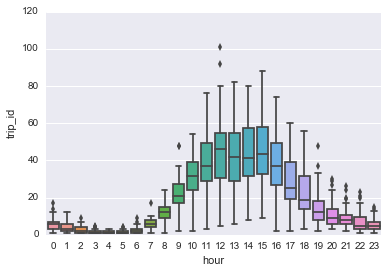

In [110]:
criteria = grouped_weekend['day_of_week'].map( lambda x: x==5 or x ==6)
weekends =grouped_weekend[criteria]
#weekends = grouped_weekend[(grouped_weekend['day_of_week'].all()==5) and (grouped_weekend['day_of_week'].all()==6)]     

sns.boxplot(x=weekends.hour, y=weekends.trip_id)  ## This is the distribution for the weekends


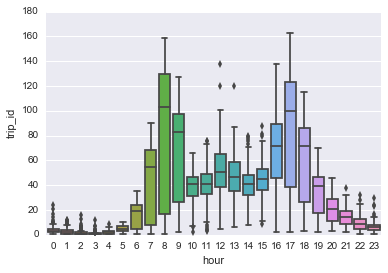

In [112]:
c = grouped_weekend['day_of_week'].map( lambda x: x>=0 or x <5)
weekdays =grouped_weekend[c]
sns.boxplot(x=weekdays.hour, y=weekdays.trip_id)  ## This is the graph for the weekdays

## For the weekend graph, we see that people are slower moving in the morning. They sleep in and rides peak around noon. For the weeday